In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("1_bias_clean.csv")



In [2]:
data=data.dropna()

In [3]:
data=data.to_numpy()
size=int(np.ceil(0.7*data.shape[0]))
X_train=data[:size]


In [4]:
data.shape

(7588, 24)

In [5]:
t1=X_train[:,-2]
t2=X_train[:,-1]

In [6]:
X=X_train[:,0:-2]
X.shape

(5312, 22)

In [30]:
k=99 # number of clusters

means = X[np.random.choice(range(len(X)), k, replace=False)]

z_prev=np.full([1, len(X)], None)

#Code perfoms clustering

convergence=True
count=0
while(convergence):

    b= np.full([1, len(X)], None)
    for i in range(k):
        dist=(np.linalg.norm(X-means[i],axis=1))**2
        b=np.vstack((b,dist))


    b=np.delete(b,0,axis=0)

    z=np.argmin(b, axis=0)

    if (z == z_prev).all():
        break
    z_prev=np.copy(z)


    Z=np.zeros((len(X),k))

    for i in range(len(X)):
        Z[i,z[i]]=1

    sum=np.sum(Z,axis=0)

    SUM=np.matmul(X.T,Z)
    for i in range(k):
        SUM[:,i]=SUM[:,i]/sum[i]

    means=SUM.T
    count=count+1

In [31]:
count

36

In [32]:
for i in range(k):
    print(means[i,0])

13.495412844036696
16.444444444444443
9.372549019607844
14.35897435897436
16.363636363636363
13.349397590361447
13.441176470588236
11.612244897959183
15.538461538461538
14.272727272727273
11.074074074074074
10.952380952380953
15.924528301886792
12.74468085106383
16.3875
10.0
11.326530612244898
12.196969696969697
11.81081081081081
13.915492957746478
14.914893617021276
14.016129032258064
12.638297872340425
13.39655172413793
13.590909090909092
15.363636363636363
14.24
18.93548387096774
12.716417910447761
13.9438202247191
6.361702127659575
11.555555555555555
13.706666666666667
10.642857142857142
9.986842105263158
12.032786885245901
13.291666666666666
12.355263157894736
16.28985507246377
1.0
17.238095238095237
15.428571428571429
15.454545454545455
12.76923076923077
11.07843137254902
6.516129032258065
11.904761904761905
11.238095238095237
7.111111111111111
11.5
17.56
12.227272727272727
11.583333333333334
12.08
7.666666666666667
18.804347826086957
5.304347826086956
15.257575757575758
12.78260

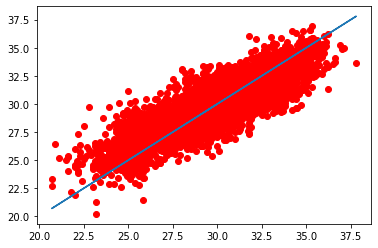

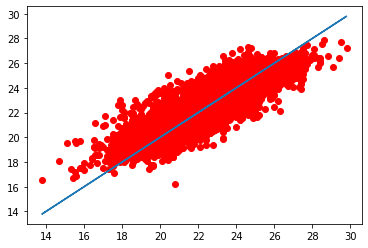

1.507573982712272 1.1508797016959758


In [33]:
import math
#Phi function transforms input variable vector x into the basis function evaluated at x 
def Q_i(x, mu_i):
    return math.exp(-1*((np.linalg.norm(x-mu_i))**2)/(sigma**2)) 

sigma = 300
l=0

def phi_matrix(X,means,k):
    Q=np.zeros((len(X),k+1))
    Q[:,0]=np.ones(len(X))
    for i in range(len(X)):
        for j in range(1,k+1):
            Q[i][j]=Q_i(X[i], means[j-1])
    return Q
    
Q=phi_matrix(X,means,k)    
    

Q_inv=np.matmul(np.linalg.inv(np.matmul(np.transpose(Q),Q)+l*np.identity(len(Q[1]))),np.transpose(Q))
W1=np.matmul(Q_inv,np.transpose(t1))
W2=np.matmul(Q_inv,np.transpose(t2))

def y_estimate(Q,w):
    return np.matmul(Q,w)

y1_estimate=y_estimate(Q,W1)
y2_estimate=y_estimate(Q,W2)

fig1=plt.figure(1)
plt.plot(t1,y1_estimate,'ro')
plt.plot(t1,t1)

fig2=plt.figure(2)
plt.plot(t2,y2_estimate,'ro')
plt.plot(t2,t2)
plt.show()

se1= (y1_estimate-t1)**2
se2=(y2_estimate-t2)**2

rms1=np.sqrt(np.mean(se1,axis=0))
rms2=np.sqrt(np.mean(se2,axis=0))

print(rms1,rms2)

In [34]:
fin=data.shape[0]

In [35]:
fin=int(np.ceil(0.9*fin))

In [36]:
fin

6830

In [37]:
X_val=data[size+1:fin]

In [38]:
X_valid=X_val[:,0:-2]

In [39]:
t1_val=X_val[:,-2]
t2_val=X_val[:,-1]

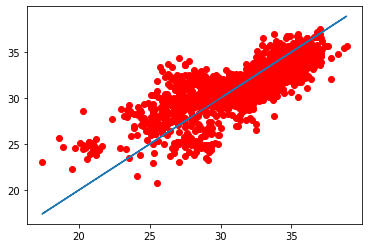

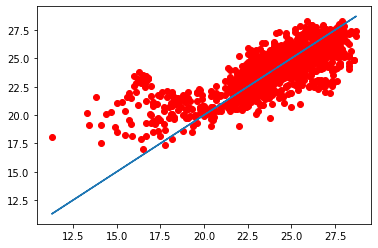

2.201735149761114 1.730330864855151


In [40]:
Q_val=phi_matrix(X_valid,means,k) 

y1_estimate_val=y_estimate(Q_val,W1)
y2_estimate_val=y_estimate(Q_val,W2)

fig3=plt.figure(3)
plt.plot(t1_val,y1_estimate_val,'ro')
plt.plot(t1_val,t1_val)

fig4=plt.figure(4)
plt.plot(t2_val,y2_estimate_val,'ro')
plt.plot(t2_val,t2_val)
plt.show()

se1_val= (y1_estimate_val-t1_val)**2
se2_val=(y2_estimate_val-t2_val)**2

rms1_val=np.sqrt(np.mean(se1_val,axis=0))
rms2_val=np.sqrt(np.mean(se2_val,axis=0))

print(rms1_val,rms2_val)
